In [141]:
import itertools
import re
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from typing import Optional

In [118]:
test_text = """target area: x=20..30, y=-10..-5"""
input_text = Path("input.txt").read_text()

In [119]:
box_re = re.compile(r".*x=(-?\d*)\.\.(-?\d*).*y=(-?\d*)\.\.(-?\d*)")


def parse_box(box_text: str) -> npt.NDArray:

    m = box_re.match(box_text)

    return np.array(m.group(1, 2, 3, 4), dtype=int)


assert np.array_equal(parse_box(test_text), np.array([20, 30, -10, -5]))

In [152]:
def find_trajectory(
    init_velocity: npt.ArrayLike,
    init_loc: npt.ArrayLike = (0, 0),
    n_steps: int = 1000,
    box: Optional[npt.NDArray] = None,
) -> npt.NDArray:

    loc = np.array(init_loc)
    velocity = np.array(init_velocity)

    trajectory = np.zeros((n_steps + 1, 2))

    trajectory[0, :] = loc

    for i in range(1, n_steps + 1):

        loc += velocity

        velocity[0] = np.sign(velocity[0]) * np.max(np.abs(velocity[0]) - 1, 0)
        velocity[1] = velocity[1] - 1

        trajectory[i, :] = loc
        
        if box is not None:
            
            if (loc[0] > box[1]) or (loc[1] < box[2]):
                break
                
            if (velocity[0] == 0) and (loc[0] < box[0]):
                break

    return trajectory

In [153]:
def traj_intersect(trajectory: npt.NDArray, box: npt.NDArray) -> bool:

    return np.any(
        np.all((box[[0, 2]] <= trajectory) & (trajectory <= box[[1, 3]]), axis=1)
    )


test_box = parse_box(test_text)

assert traj_intersect(find_trajectory((7, 2), box=test_box), test_box)
assert traj_intersect(find_trajectory((6, 3)), test_box)
assert traj_intersect(find_trajectory((9, 0)), test_box)
assert not traj_intersect(find_trajectory((17, -4)), test_box)

In [154]:
def find_all_traj(
    box: npt.NDArray,
    x_vel: npt.NDArray = np.arange(20),
    y_vel: npt.NDArray = np.arange(20),
    n_steps: int = 40,
) -> int:

    traj_dict = {}

    for vel in itertools.product(x_vel, y_vel):

        traj = find_trajectory(vel, n_steps=n_steps, box=box)
        intersect = traj_intersect(traj, box)

        if intersect:

            traj_dict[vel] = np.max(traj[:, 1])
            
    return traj_dict

In [159]:
# find_all_traj(parse_box(input_text), x_vel=np.arange(40), y_vel=np.arange(200), n_steps=400)

In [157]:
def part_one(box_text) -> int:

    traj_dict = find_all_traj(parse_box(box_text), x_vel=np.arange(40), y_vel=np.arange(200), n_steps=400)
            
    return max(traj_dict.values())


assert part_one(test_text) == 45

In [158]:
part_one(input_text)

9180.0

In [179]:
traj_dict = find_all_traj(parse_box(input_text), x_vel=np.arange(300), y_vel=np.arange(-200, 300), n_steps=1000)

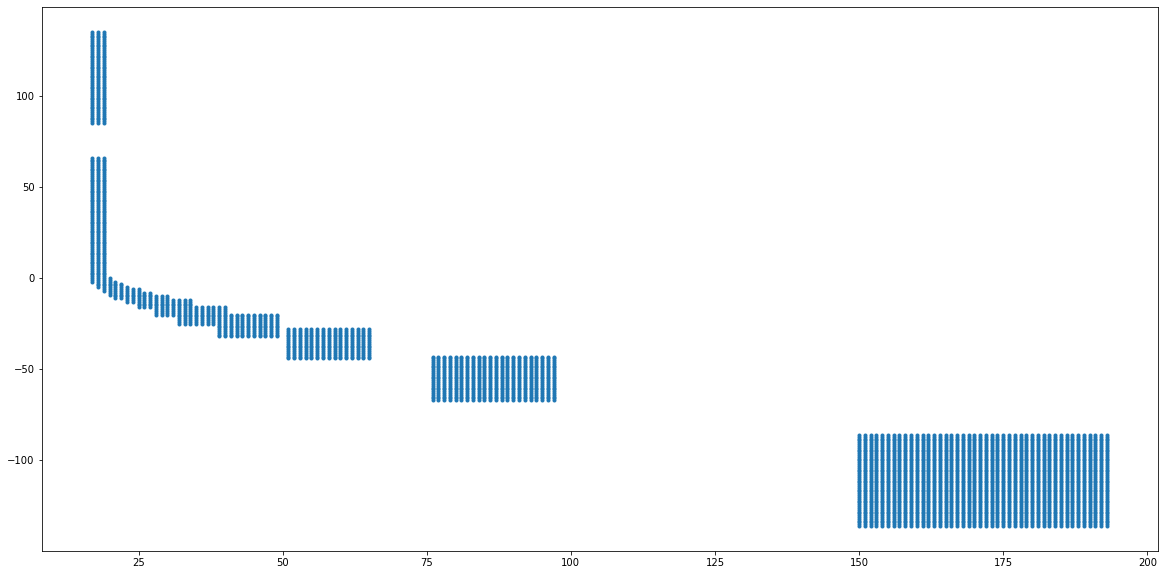

In [180]:
plt.figure(figsize=(20,10))

valid_traj = np.array(list(traj_dict.keys()))

plt.scatter(valid_traj[:,0], valid_traj[:,1], marker=".")

In [181]:
len(traj_dict)

3767

In [80]:
def plot_traj(traj, box):

    plt.scatter(traj[:, 0], traj[:, 1], marker=".", color="black")
    plt.gca().add_patch(
        plt.Rectangle(
            box[[0, 2]],
            np.abs(box[1] - box[0]),
            np.abs(box[3] - box[2]),
            zorder=-1,
        )
    )

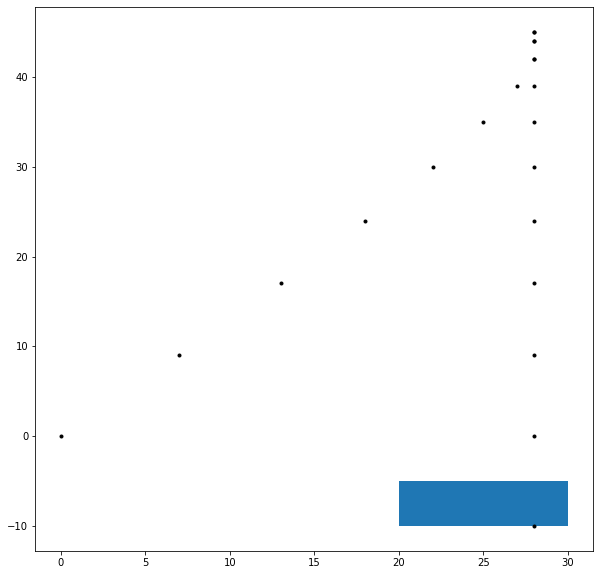

In [104]:
plt.figure(figsize=(10, 10))

plot_traj(find_trajectory((7, 9), n_steps=20), test_box)

In [61]:
traj = find_trajectory((17, -4), (0, 0))
box = parse_box(test_text)

In [62]:
box[[0, 2]]

array([ 20, -10])

In [63]:
box[[0, 2]] < traj

array([[False,  True],
       [False,  True],
       [ True,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False]])

In [64]:
traj < box[[1, 3]]

array([[ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [65]:
(box[[0, 2]] < traj) & (traj < box[[1, 3]])

array([[False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [66]:
np.all((box[[0, 2]] < traj) & (traj < box[[1, 3]]), axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [67]:
np.any(np.all((box[[0, 2]] < traj) & (traj < box[[1, 3]]), axis=1))

False

In [51]:
traj < box[[1, 3]]

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

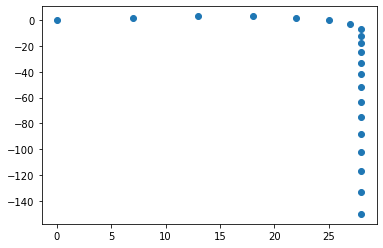

In [19]:
traj = trajectory((7, 2), (0, 0))

plt.scatter(traj[:, 0], traj[:, 1])